In [2]:
from sklearn.datasets import load_iris
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.model_selection import train_test_split

In [3]:
iris_sklearn = load_iris()
iris_df = pd.DataFrame(data=iris_sklearn.data, columns=iris_sklearn.feature_names)

In [4]:
iris_df['class'] = iris_sklearn.target

In [5]:
dataset_shape = iris_df.shape
num_features = iris_df.shape[1] - 1
target_classes_count = iris_df['class'].value_counts()
missing_percentage = iris_df.isnull().mean() * 100
description = iris_df.describe()

In [6]:
print(dataset_shape, '\n', f'Num of features {num_features}\n', target_classes_count,
      f' Missing percentage: {missing_percentage}\n', description)

(150, 5) 
 Num of features 4
 class
0    50
1    50
2    50
Name: count, dtype: int64  Missing percentage: sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
class                0.0
dtype: float64
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)       class  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min           

In [7]:
correlation_matrix = iris_df.corr()
correlation_by_class = iris_df.groupby('class').corr()

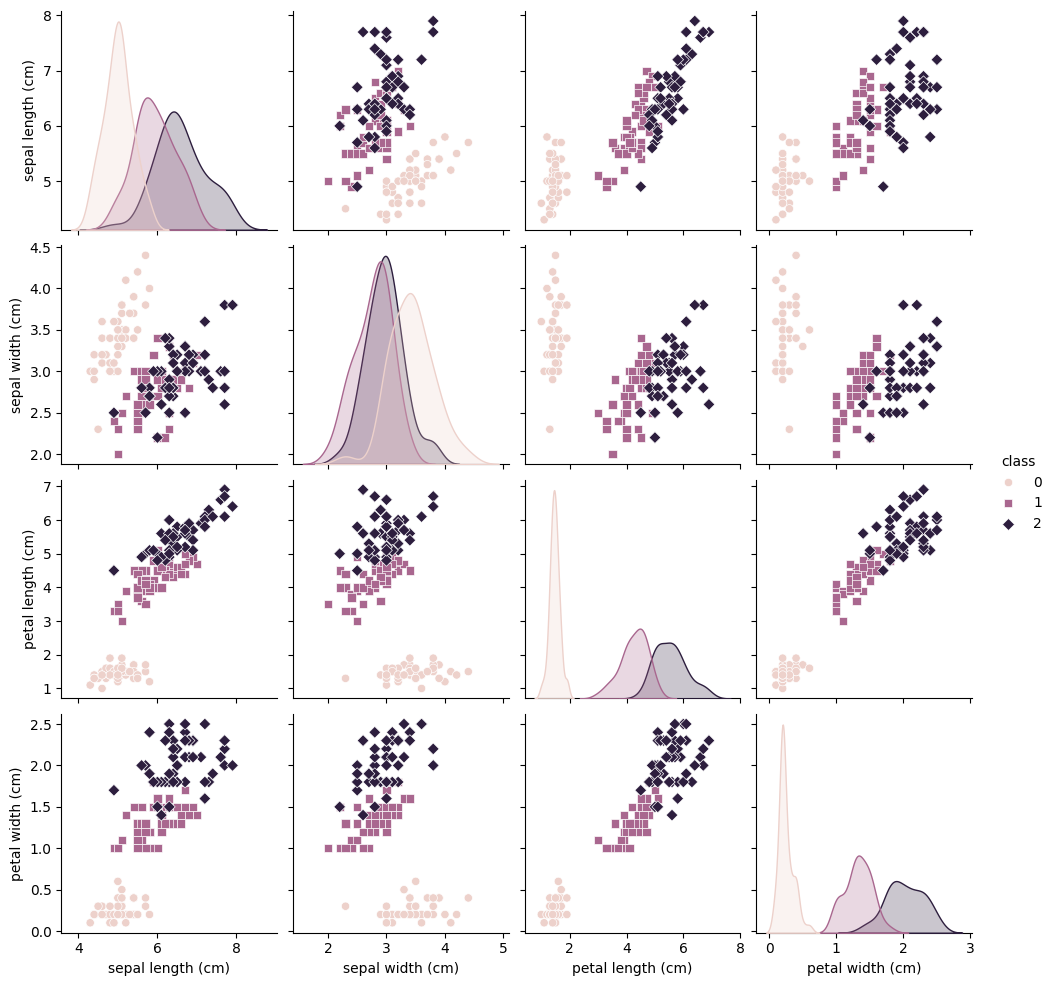

In [8]:
sns.pairplot(iris_df, hue='class', markers=["o", "s", "D"])
plt.show()

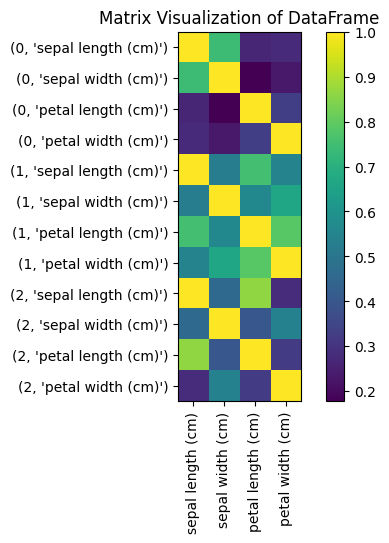

In [9]:
plt.imshow(correlation_by_class, cmap='viridis', interpolation='none')
plt.colorbar()
plt.title("Matrix Visualization of DataFrame")
plt.xticks(ticks=np.arange(len(correlation_by_class.columns)), labels=correlation_by_class.columns, rotation=90)
plt.yticks(ticks=np.arange(len(correlation_by_class.index)), labels=correlation_by_class.index)
plt.show()

In [10]:
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
selected_labels = ['sepal_length', 'petal_length']

In [11]:
df_binary = iris_df[iris_df['class'].isin([0, 1])]
X = df_binary.drop(columns=['class'])
y = df_binary['class']

In [12]:
feature_names = X.columns

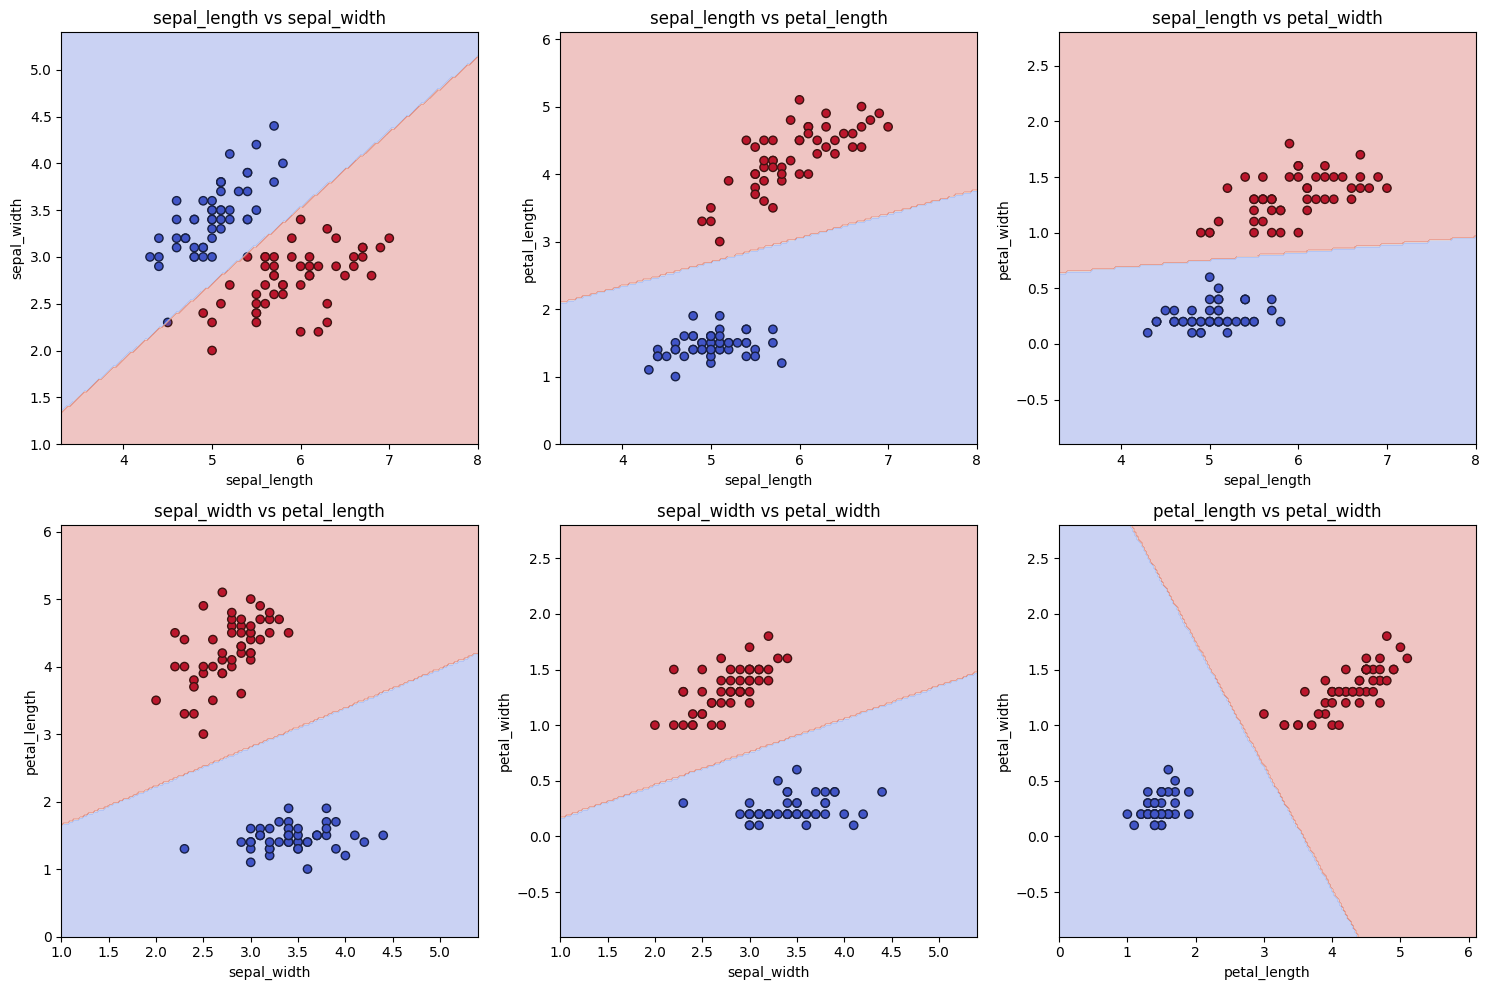

In [13]:
plt.figure(figsize=(15, 10))
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
for i, (fst, snd) in enumerate(pairs):
    plt.subplot(2, 3, i + 1)
    X_pair = X.iloc[:, [fst, snd]]
    lda_pair = LinearDiscriminantAnalysis()
    lda_pair.fit(X_pair.values, y)

    plt.scatter(X_pair.iloc[:, 0], X_pair.iloc[:, 1], c=y, cmap='coolwarm', edgecolor='k')

    x_min, x_max = X_pair.iloc[:, 0].min() - 1, X_pair.iloc[:, 0].max() + 1
    y_min, y_max = X_pair.iloc[:, 1].min() - 1, X_pair.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

    Z = lda_pair.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    plt.xlabel(feature_names[fst])
    plt.ylabel(feature_names[snd])
    plt.title(f'{feature_names[fst]} vs {feature_names[snd]}')


plt.tight_layout()
plt.show()

In [14]:
X = X[['sepal_length', 'sepal_width']]

In [15]:
lda = LinearDiscriminantAnalysis()
lda.fit(X.values, y)

X_reg = X[['sepal_length']].values
y_reg = X['sepal_width'].values
reg = LinearRegression()
reg.fit(X_reg, y_reg)

LinearRegression()

In [16]:
x_min, x_max = X['sepal_length'].min() - 1, X['sepal_length'].max() + 1
y_min, y_max = X['sepal_width'].min() - 1, X['sepal_width'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

In [17]:
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

reg_line_x = np.linspace(x_min, x_max, 100).reshape(-1, 1)
reg_line_y = reg.predict(reg_line_x)

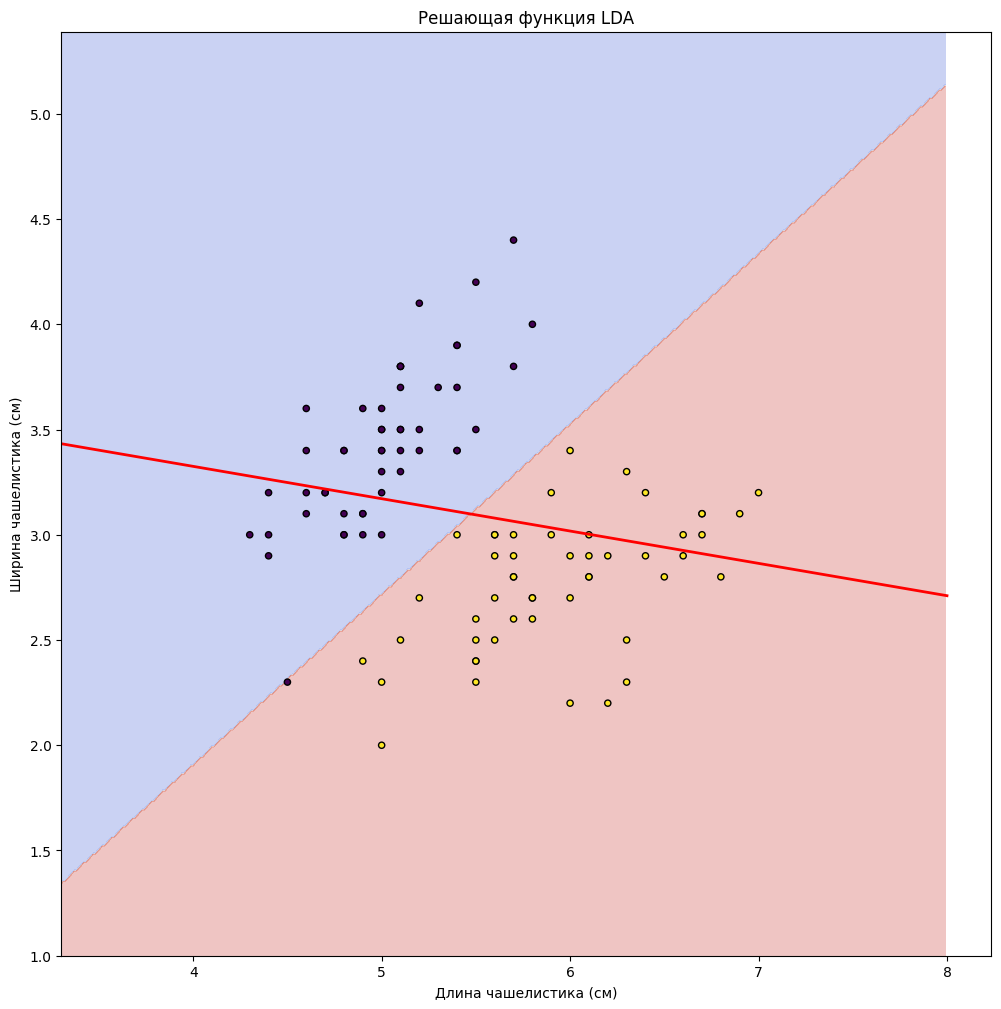

In [18]:
plt.figure(figsize=(12, 12))

plt.plot(reg_line_x, reg_line_y, color='red', linewidth=2)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X['sepal_length'], X['sepal_width'], c=y, edgecolor='k', s=20)
plt.xlabel('Длина чашелистика (см)')
plt.ylabel('Ширина чашелистика (см)')
plt.title('Решающая функция LDA')

plt.show()

In [19]:
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', s=20)
    ax.set_xlabel('Длина чашелистика (см)')
    ax.set_ylabel('Ширина чашелистика (см)')
    ax.set_title(title)

In [20]:
lda = LinearDiscriminantAnalysis()
lda.fit(X.values, y)

svm = SVC(kernel='linear')
svm.fit(X.values, y)

log_reg = LogisticRegression()
log_reg.fit(X.values, y)

naive_bayes = GaussianNB()
naive_bayes.fit(X.values, y)

GaussianNB()

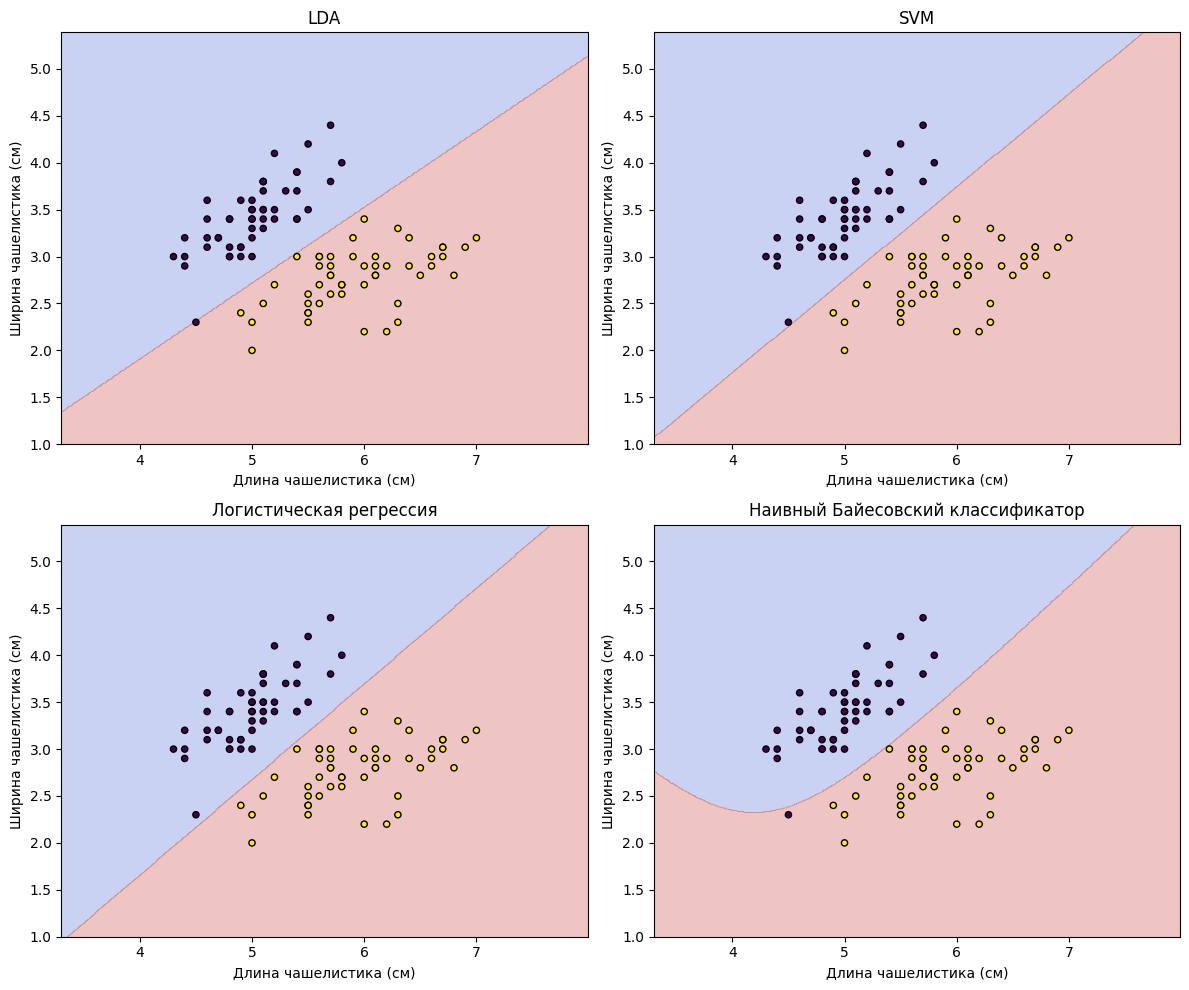

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))


plot_decision_boundary(lda, X, y, axs[0, 0], title='LDA')
plot_decision_boundary(svm, X, y, axs[0, 1], title='SVM')
plot_decision_boundary(log_reg, X, y, axs[1, 0], title='Логистическая регрессия')
plot_decision_boundary(naive_bayes, X, y, axs[1, 1], title='Наивный Байесовский классификатор')

plt.tight_layout()
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
models = {
    'LDA': LinearDiscriminantAnalysis(),
    'SVM': SVC(probability=True),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB()
}

In [25]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    cm = confusion_matrix(y_test, y_pred)
    print(f"\nМатрица ошибок для {model.__class__.__name__}:\n{cm}")

    print(classification_report(y_test, y_pred))

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


Матрица ошибок для LinearDiscriminantAnalysis:
[[17  0]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



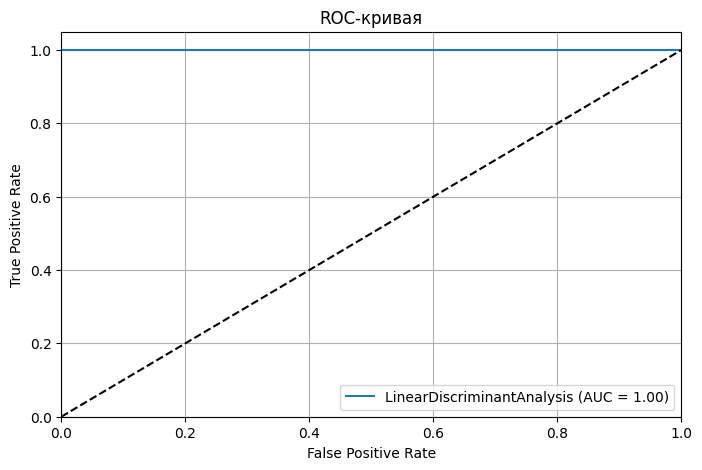


Матрица ошибок для SVC:
[[17  0]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



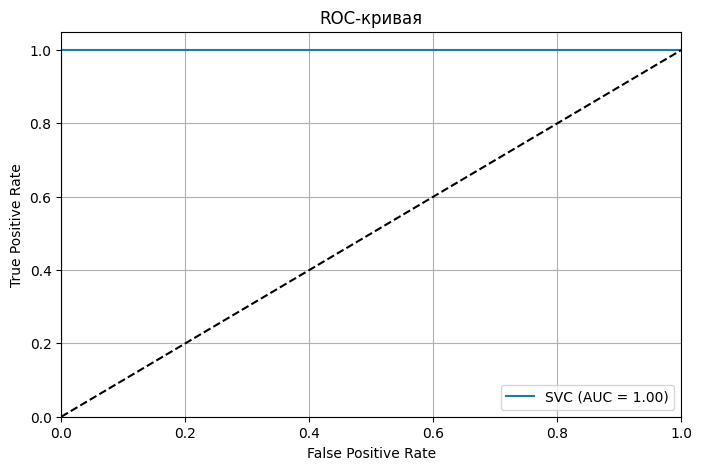


Матрица ошибок для LogisticRegression:
[[17  0]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



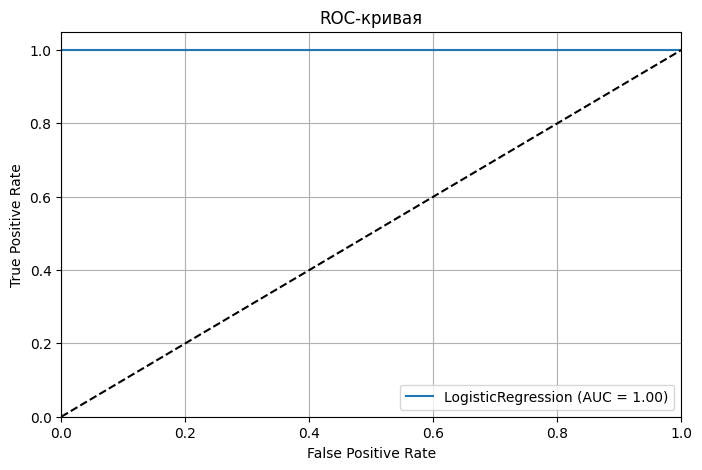


Матрица ошибок для GaussianNB:
[[17  0]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



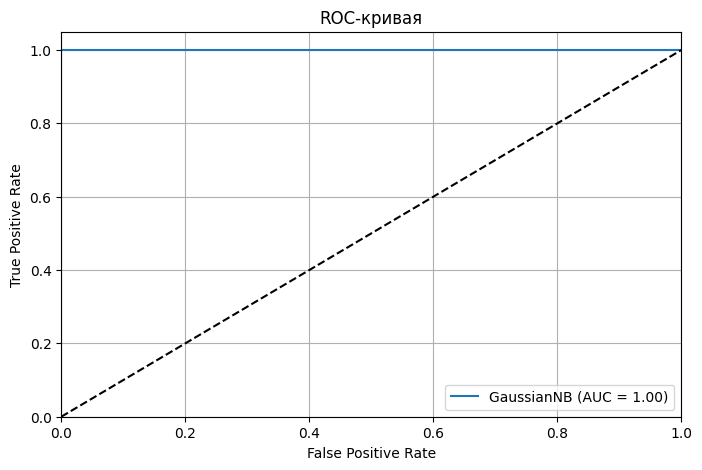

In [26]:
for model_name, model in models.items():
    evaluate_model(model, X_train, y_train, X_test, y_test)